# Counterfeit Currency Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Cleaning and Preprocessing

In [2]:
#Import the csv 
df = pd.read_csv("fake_currency_data.csv")
df

,Country,Denomination,Counterfeit,SerialNumber,SecurityFeatures,Weight,Length,Width,Thickness
0,USA,$100,1,25973198,Hologram,1.731759,130.243185,66.537999,0.098488
1,USA,$20,1,95903230,Security Thread,1.002179,152.596364,76.135834,0.094119
2,EU,€10,0,82937914,Hologram,2.306713,152.857126,66.772442,0.061393
3,USA,€20,1,23612989,Microprint,1.366965,143.133672,78.377052,0.053114
4,EU,€20,1,56025342,Watermark,1.796075,129.664777,75.916093,0.051438
...,...,...,...,...,...,...,...,...,...
999995,EU,$100,1,24436622,Watermark,1.472511,134.888731,75.425943,0.093939
999996,EU,£20,1,82654212,Hologram,2.355633,147.830149,65.232274,0.097358
999997,USA,$5,0,59174754,Microprint,1.393764,150.050308,69.273269,0.068363
999998,EU,£10,0,55268089,Watermark,2.026417,142.852137,77.878841,0.081160


In [3]:
#Check for any NaN values
print(df.info(), "\n")

#Check for duplicate values
print("Number of duplicates:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Country           1000000 non-null  object 
 1   Denomination      1000000 non-null  object 
 2   Counterfeit       1000000 non-null  int64  
 3   SerialNumber      1000000 non-null  int64  
 4   SecurityFeatures  1000000 non-null  object 
 5   Weight            1000000 non-null  float64
 6   Length            1000000 non-null  float64
 7   Width             1000000 non-null  float64
 8   Thickness         1000000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 68.7+ MB
None 

Number of duplicates: 0


In [4]:
#Rename Denomination column to value
df = df.rename(columns={"Denomination": "Value"})

# Define a mapping from symbols to denominations
symbol_to_denomination = {
    "$": "USD",
    "€": "EUR",
    "£": "GBP"
}

# Function to extract the symbol
def extract_symbol(amount):
    return amount[0]

# Create a new column for denominations
df["Denomination"] = df["Value"].apply(lambda x: symbol_to_denomination[extract_symbol(x)])

# Function to remove the first character from a string
def remove_first_char(s):
    return s[1:]

# Apply the function to the 'amount' column
df["Value"] = df["Value"].apply(remove_first_char)

# Make "Value" column numeric
df["Value"] = pd.to_numeric(df["Value"], errors="coerce")

df

,Country,Value,Counterfeit,SerialNumber,SecurityFeatures,Weight,Length,Width,Thickness,Denomination
0,USA,100,1,25973198,Hologram,1.731759,130.243185,66.537999,0.098488,USD
1,USA,20,1,95903230,Security Thread,1.002179,152.596364,76.135834,0.094119,USD
2,EU,10,0,82937914,Hologram,2.306713,152.857126,66.772442,0.061393,EUR
3,USA,20,1,23612989,Microprint,1.366965,143.133672,78.377052,0.053114,EUR
4,EU,20,1,56025342,Watermark,1.796075,129.664777,75.916093,0.051438,EUR
...,...,...,...,...,...,...,...,...,...,...
999995,EU,100,1,24436622,Watermark,1.472511,134.888731,75.425943,0.093939,USD
999996,EU,20,1,82654212,Hologram,2.355633,147.830149,65.232274,0.097358,GBP
999997,USA,5,0,59174754,Microprint,1.393764,150.050308,69.273269,0.068363,USD
999998,EU,10,0,55268089,Watermark,2.026417,142.852137,77.878841,0.081160,GBP


In [5]:
#One Hot Encode categorical predictors
df = pd.get_dummies(df, columns = ["SecurityFeatures", "Country", "Denomination"], dtype="int")
df

,Value,Counterfeit,SerialNumber,Weight,Length,Width,Thickness,SecurityFeatures_Hologram,SecurityFeatures_Microprint,SecurityFeatures_Security Thread,SecurityFeatures_Watermark,Country_EU,Country_UK,Country_USA,Denomination_EUR,Denomination_GBP,Denomination_USD
0,100,1,25973198,1.731759,130.243185,66.537999,0.098488,1,0,0,0,0,0,1,0,0,1
1,20,1,95903230,1.002179,152.596364,76.135834,0.094119,0,0,1,0,0,0,1,0,0,1
2,10,0,82937914,2.306713,152.857126,66.772442,0.061393,1,0,0,0,1,0,0,1,0,0
3,20,1,23612989,1.366965,143.133672,78.377052,0.053114,0,1,0,0,0,0,1,1,0,0
4,20,1,56025342,1.796075,129.664777,75.916093,0.051438,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,100,1,24436622,1.472511,134.888731,75.425943,0.093939,0,0,0,1,1,0,0,0,0,1
999996,20,1,82654212,2.355633,147.830149,65.232274,0.097358,1,0,0,0,1,0,0,0,1,0
999997,5,0,59174754,1.393764,150.050308,69.273269,0.068363,0,1,0,0,0,0,1,0,0,1
999998,10,0,55268089,2.026417,142.852137,77.878841,0.081160,0,0,0,1,1,0,0,0,1,0


In [6]:
#Move Counterfeit column to the end
df = df[[c for c in df if c not in ["Counterfeit"]] + ["Counterfeit"]]
df

,Value,SerialNumber,Weight,Length,Width,Thickness,SecurityFeatures_Hologram,SecurityFeatures_Microprint,SecurityFeatures_Security Thread,SecurityFeatures_Watermark,Country_EU,Country_UK,Country_USA,Denomination_EUR,Denomination_GBP,Denomination_USD,Counterfeit
0,100,25973198,1.731759,130.243185,66.537999,0.098488,1,0,0,0,0,0,1,0,0,1,1
1,20,95903230,1.002179,152.596364,76.135834,0.094119,0,0,1,0,0,0,1,0,0,1,1
2,10,82937914,2.306713,152.857126,66.772442,0.061393,1,0,0,0,1,0,0,1,0,0,0
3,20,23612989,1.366965,143.133672,78.377052,0.053114,0,1,0,0,0,0,1,1,0,0,1
4,20,56025342,1.796075,129.664777,75.916093,0.051438,0,0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,100,24436622,1.472511,134.888731,75.425943,0.093939,0,0,0,1,1,0,0,0,0,1,1
999996,20,82654212,2.355633,147.830149,65.232274,0.097358,1,0,0,0,1,0,0,0,1,0,1
999997,5,59174754,1.393764,150.050308,69.273269,0.068363,0,1,0,0,0,0,1,0,0,1,0
999998,10,55268089,2.026417,142.852137,77.878841,0.081160,0,0,0,1,1,0,0,0,1,0,0


## Exploratory Data Analysis

### Univariate Analysis

In [7]:
#Analysis of continuous features
df[["Value","SerialNumber","Weight","Length","Width","Thickness"]].describe()

,Value,SerialNumber,Weight,Length,Width,Thickness
count,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,21.367511,5.502259e+07,1.649766,140.020542,70.003944,0.074995
std,26.828397,2.598490e+07,0.490712,11.544293,5.772709,0.014442
min,1.000000,1.000015e+07,0.800003,120.000073,60.000005,0.050000
25%,5.000000,3.249784e+07,1.224855,130.034878,64.999762,0.062487
50%,10.000000,5.506594e+07,1.649137,140.032496,70.008440,0.074992
75%,20.000000,7.751115e+07,2.074540,150.022309,75.006372,0.087499
max,100.000000,9.999994e+07,2.499999,159.999961,79.999983,0.100000


#### Value

Text(0.5, 1.0, 'Dollar Value Count')

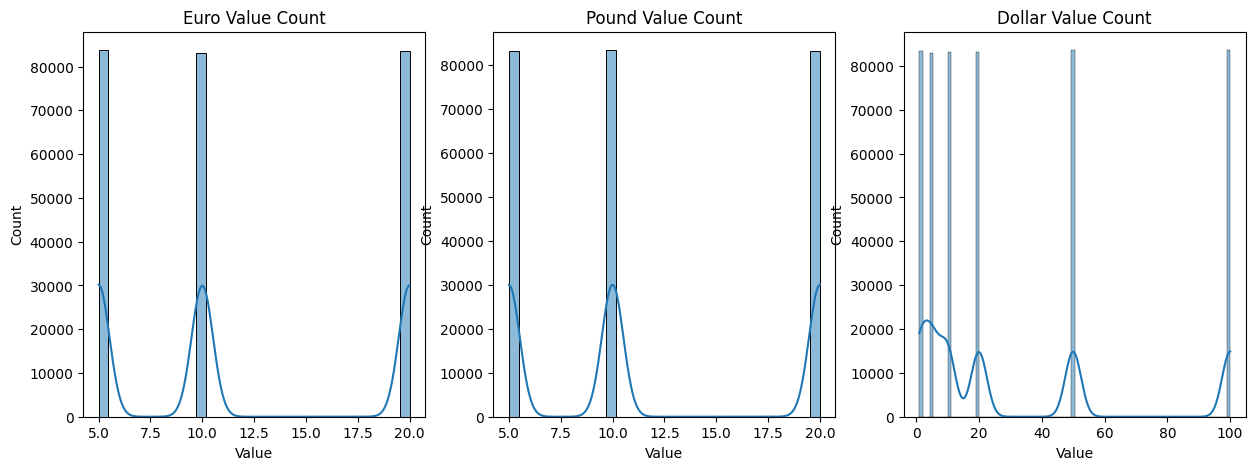

In [8]:
#Create sub-dataframes of each denomination
df_eur = df[df['Denomination_EUR'] == 1]
df_gbp = df[df['Denomination_GBP'] == 1]
df_usd = df[df['Denomination_USD'] == 1]

#Count of value for each denomination
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df_eur.Value,kde=True, ax=axes[0])
axes[0].set_title('Euro Value Count')

sns.histplot(df_gbp.Value,kde=True, ax=axes[1])
axes[1].set_title('Pound Value Count')

sns.histplot(df_usd.Value,kde=True, ax=axes[2])
axes[2].set_title('Dollar Value Count')

#### Length

Text(0.5, 1.0, 'Dollar Length Count')

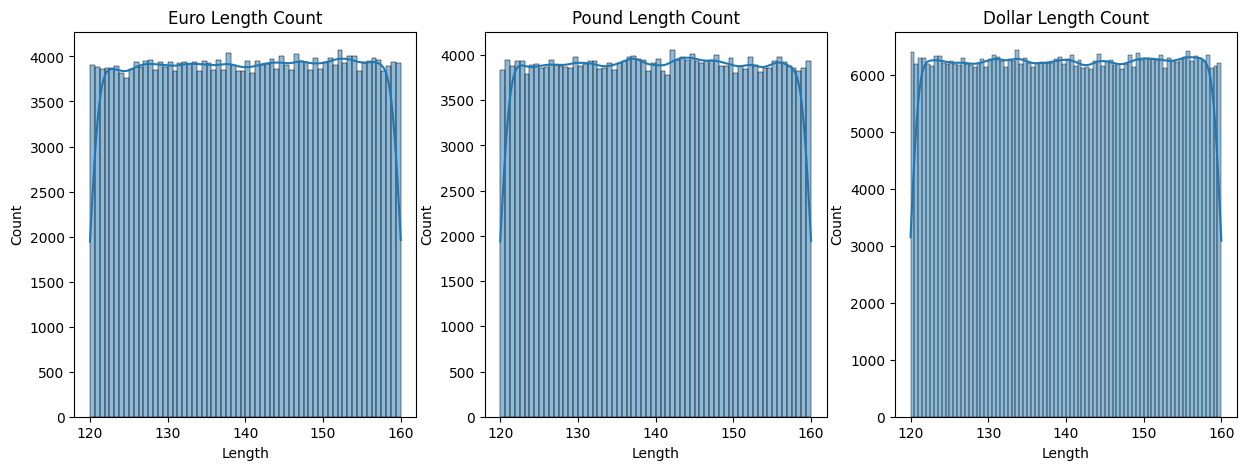

In [9]:
#Count of the lengths of each denomination
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df_eur.Length, kde=True, ax=axes[0])
axes[0].set_title('Euro Length Count')

sns.histplot(df_gbp.Length, kde=True, ax=axes[1])
axes[1].set_title('Pound Length Count')

sns.histplot(df_usd.Length, kde=True, ax=axes[2])
axes[2].set_title('Dollar Length Count')

In [10]:
print("Median of length of Euros", round(df_eur.Length.median(), 2), "mm")
print("Median of length of Pounds:", round(df_gbp.Length.median(), 2), "mm")
print("Median of length of Dollars", round(df_usd.Length.median(), 2), "mm")

Median of length of Euros 140.09 mm
Median of length of Pounds: 140.02 mm
Median of length of Dollars 140.01 mm


#### Weight

Text(0.5, 1.0, 'Dollar Weight Count')

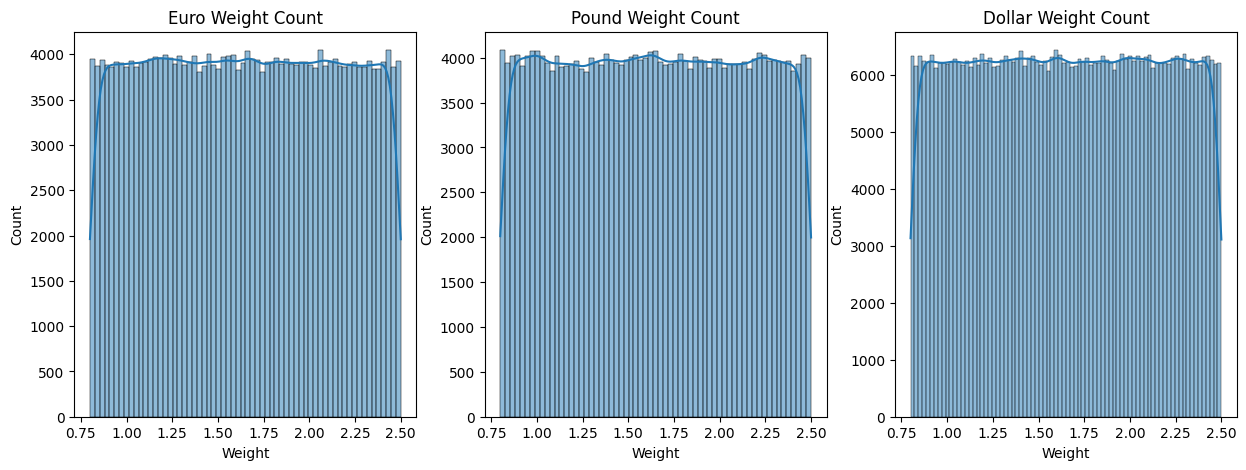

In [11]:
#Count of the weight of each denomination
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df_eur.Weight, kde=True, ax=axes[0])
axes[0].set_title('Euro Weight Count')

sns.histplot(df_gbp.Weight, kde=True, ax=axes[1])
axes[1].set_title('Pound Weight Count')

sns.histplot(df_usd.Weight, kde=True, ax=axes[2])
axes[2].set_title('Dollar Weight Count')

In [12]:
print("Median of weight of Euros", round(df_eur.Weight.median(), 2), "g")
print("Median of weight of Pounds:", round(df_gbp.Weight.median(), 2), "g")
print("Median of weight of Dollars", round(df_usd.Weight.median(), 2), "g")

Median of weight of Euros 1.65 g
Median of weight of Pounds: 1.65 g
Median of weight of Dollars 1.65 g


#### Width

Text(0.5, 1.0, 'Dollar Width Count')

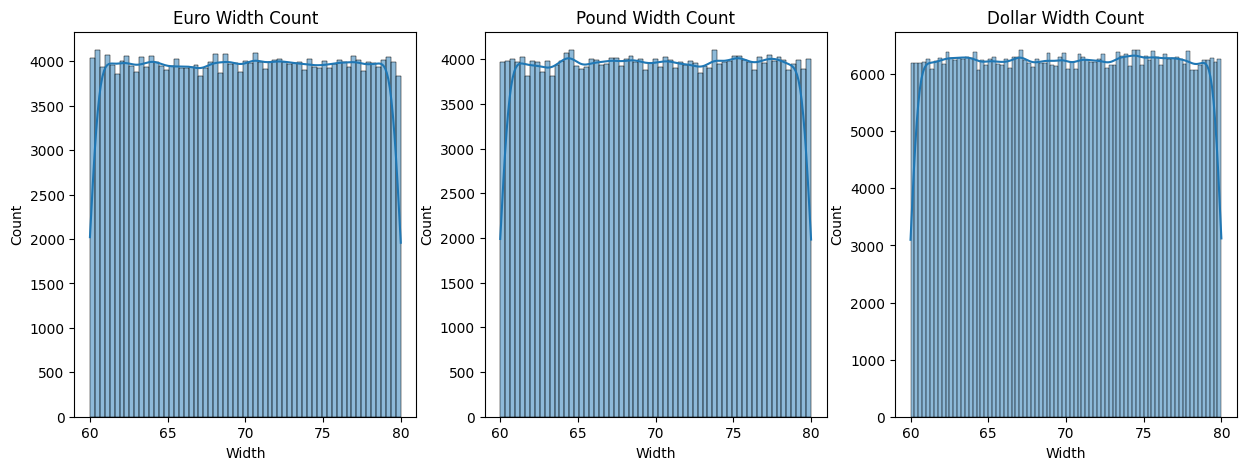

In [13]:
#Count of the weight of each denomination
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df_eur.Width, kde=True, ax=axes[0])
axes[0].set_title('Euro Width Count')

sns.histplot(df_gbp.Width, kde=True, ax=axes[1])
axes[1].set_title('Pound Width Count')

sns.histplot(df_usd.Width, kde=True, ax=axes[2])
axes[2].set_title('Dollar Width Count')

In [14]:
print("Median of width of Euros", round(df_eur.Width.median(), 2), "mm")
print("Median of width of Pounds:", round(df_gbp.Width.median(), 2), "mm")
print("Median of width of Dollars", round(df_usd.Width.median(), 2), "mm")

Median of width of Euros 70.01 mm
Median of width of Pounds: 70.01 mm
Median of width of Dollars 70.01 mm


#### Thickness

Text(0.5, 1.0, 'Dollar Thickness Count')

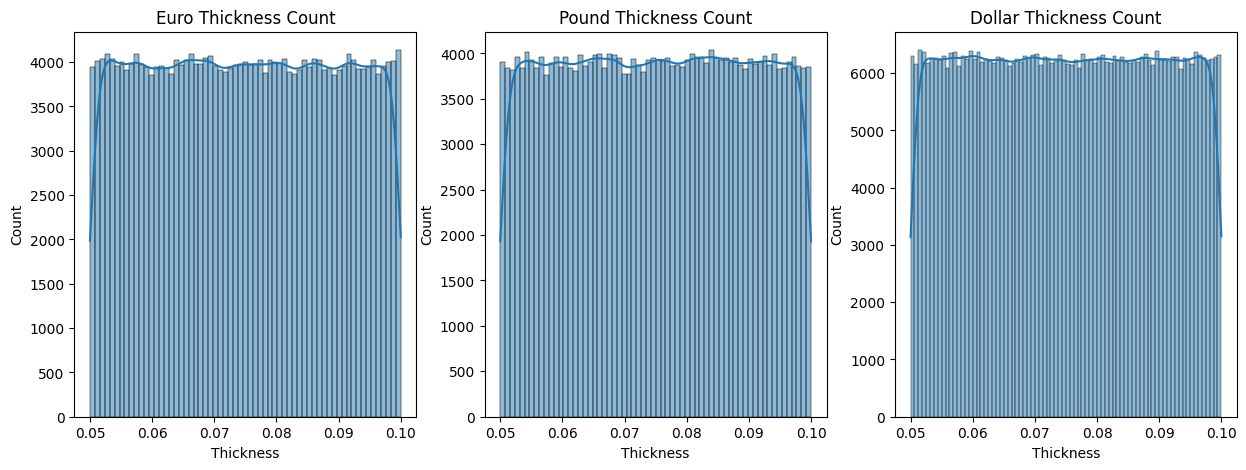

In [15]:
#Count of the weight of each denomination
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df_eur.Thickness, kde=True, ax=axes[0])
axes[0].set_title('Euro Thickness Count')

sns.histplot(df_gbp.Thickness, kde=True, ax=axes[1])
axes[1].set_title('Pound Thickness Count')

sns.histplot(df_usd.Thickness, kde=True, ax=axes[2])
axes[2].set_title('Dollar Thickness Count')

In [16]:
print("Median of thickness of Euros", round(df_eur.Thickness.median(), 4), "mm")
print("Median of thickness of Pounds:", round(df_gbp.Thickness.median(), 4), "mm")
print("Median of thickness of Dollars", round(df_usd.Thickness.median(), 4), "mm")

Median of thickness of Euros 0.075 mm
Median of thickness of Pounds: 0.075 mm
Median of thickness of Dollars 0.075 mm


#### Security Features

In [17]:
df_original = pd.read_csv("fake_currency_data.csv")

<Axes: xlabel='count', ylabel='SecurityFeatures'>

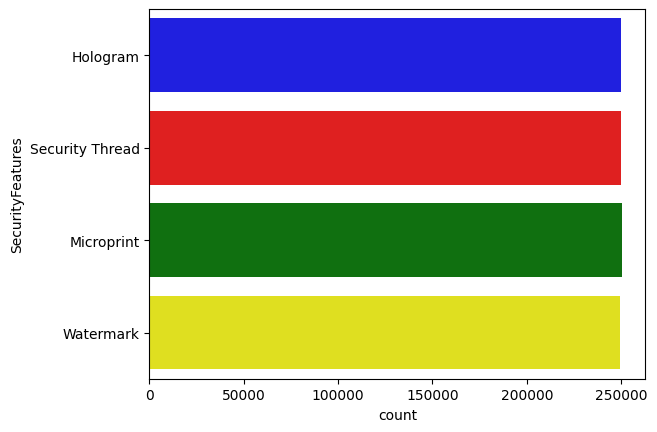

In [18]:
#Count all the security features
sns.countplot(df_original.SecurityFeatures, palette=["blue","red","green","yellow"])

#### Country

<Axes: xlabel='count', ylabel='Country'>

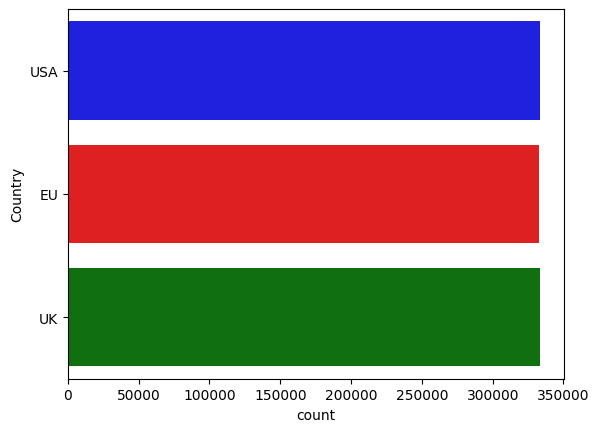

In [19]:
sns.countplot(df_original.Country, palette=["blue","red","green"])

### Bivariate Analysis

In [20]:
#Check the linear dependency of continuous variables
df[["Value","SerialNumber","Weight","Length","Width","Thickness"]].corr()

,Value,SerialNumber,Weight,Length,Width,Thickness
Value,1.000000,0.001795,-0.001224,-0.000296,0.000373,-0.000434
SerialNumber,0.001795,1.000000,0.000688,-0.000604,-0.000613,0.000410
Weight,-0.001224,0.000688,1.000000,-0.000037,0.000589,0.000269
Length,-0.000296,-0.000604,-0.000037,1.000000,-0.000152,-0.001139
Width,0.000373,-0.000613,0.000589,-0.000152,1.000000,0.000497
Thickness,-0.000434,0.000410,0.000269,-0.001139,0.000497,1.000000


In [21]:
#Check the dependency of continous and categorical variables
df.groupby(by="Counterfeit").agg("mean")[["Value","SerialNumber","Weight","Length","Width","Thickness"]]

,Value,SerialNumber,Weight,Length,Width,Thickness
Counterfeit,,,,,,
0,21.398738,5.503707e+07,1.650006,140.037239,70.000000,0.074988
1,21.336208,5.500808e+07,1.649525,140.003805,70.007899,0.075002


Text(0.5, 1.0, 'Counterfeit v Country')

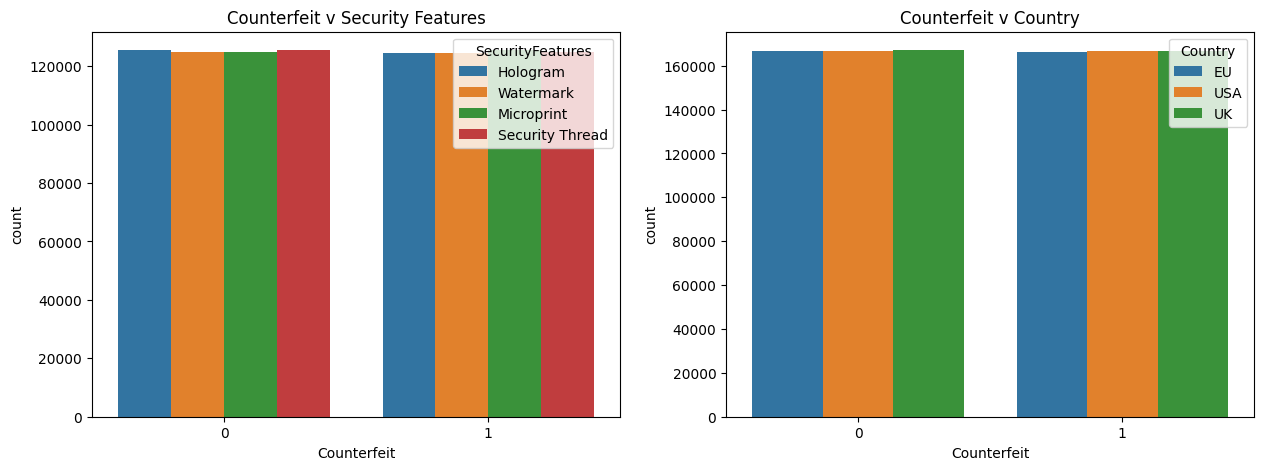

In [22]:
#Check dependency of categorical and categorical variables
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(df_original, x="Counterfeit", hue = "SecurityFeatures", ax=axes[0])
axes[0].set_title('Counterfeit v Security Features')

sns.countplot(df_original, x="Counterfeit", hue = "Country", ax=axes[1])
axes[1].set_title('Counterfeit v Country')

## Model Selection and Training

In [23]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [24]:
#Split data into a training and a testing group
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:,-1], test_size=0.2)

### Logistic Regression

In [25]:
model = make_pipeline(StandardScaler(), LogisticRegression(solver = "saga", max_iter = 1000))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, solver='saga'))])

In [26]:
#Predictions
y_pred = model.predict(X_train)

In [27]:
# Calculate accuracy using the model's score method
accuracy_model_score = model.score(X_train, y_train)

# Print the accuracies
print(f"Training Accuracy (model's score method): {100*accuracy_model_score:.2f}")

Training Accuracy (model's score method): 50.21


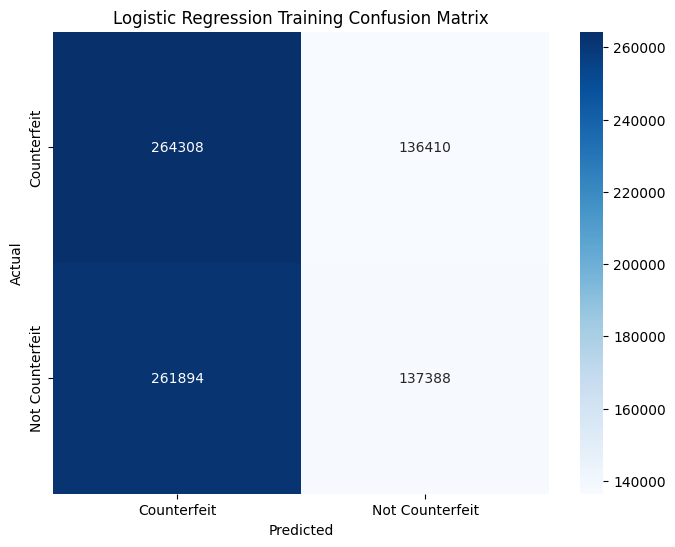

In [28]:
conf_matrix = confusion_matrix(y_train, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=("Counterfeit", "Not Counterfeit"), yticklabels=("Counterfeit", "Not Counterfeit"))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Training Confusion Matrix')
plt.show()

### SGD Classifier

In [40]:
#Scaling pipeline
clf = make_pipeline(StandardScaler(), SGDClassifier(early_stopping = True))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(early_stopping=True))])

In [41]:
#Predictions
y_pred2 = clf.predict(X_train)

In [42]:
# Calculate accuracy using the model's score method
accuracy_model_score = clf.score(X_train, y_train)

# Print the accuracies
print(f"Training Accuracy (model's score method): {100*accuracy_model_score:.2f}")

Training Accuracy (model's score method): 50.07


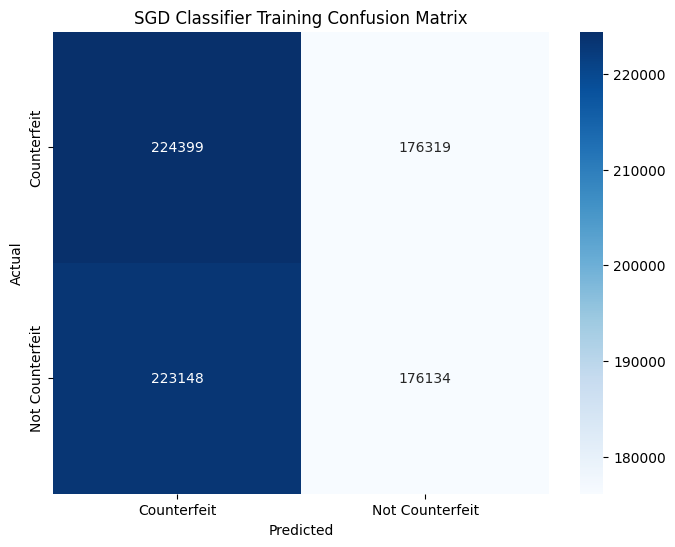

In [43]:
conf_matrix = confusion_matrix(y_train, y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=("Counterfeit", "Not Counterfeit"), yticklabels=("Counterfeit", "Not Counterfeit"))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SGD Classifier Training Confusion Matrix')
plt.show()

## Model Evaluation

### Logistic Regression II

In [33]:
#Predictions
y_pred3 = model.predict(X_test)

In [34]:
# Calculate accuracy using the model's score method
accuracy_model_score = model.score(X_test, y_test)

# Print the accuracies
print(f"Testing Accuracy (model's score method): {100*accuracy_model_score:.2f}")

Testing Accuracy (model's score method): 49.84


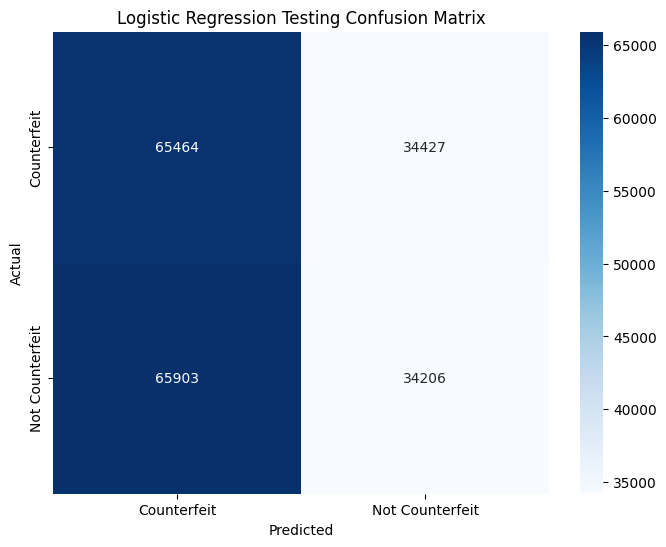

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred3)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=("Counterfeit", "Not Counterfeit"), yticklabels=("Counterfeit", "Not Counterfeit"))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Testing Confusion Matrix')
plt.show()

## SGD Classifier II

In [36]:
#Predictions
y_pred4 = clf.predict(X_test)

In [37]:
# Calculate accuracy using the model's score method
accuracy_model_score = clf.score(X_test, y_test)

# Print the accuracies
print(f"Testing Accuracy (model's score method): {100*accuracy_model_score:.2f}")

Testing Accuracy (model's score method): 50.00


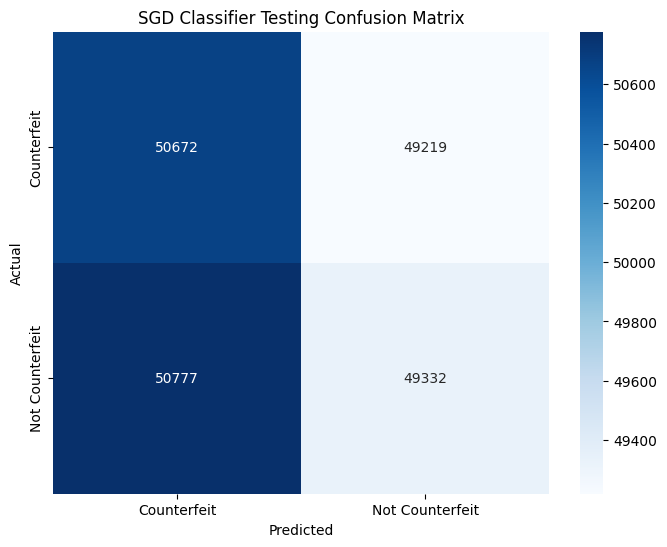

In [39]:
conf_matrix = confusion_matrix(y_test, y_pred4)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=("Counterfeit", "Not Counterfeit"), yticklabels=("Counterfeit", "Not Counterfeit"))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SGD Classifier Testing Confusion Matrix')
plt.show()

Disclaimer: Not for commercial use.  
Sourced from: [Fake Currency Data](https://www.kaggle.com/datasets/mdladla/fake-currency-data)